MeMAD Dataset :  Evaluation
===============================

This notebook serves as evaluation for the face recognition system.

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ipywidgets as widgets
from sklearn.metrics import precision_recall_fscore_support as score


from src import clusterize

Load the original dataset

In [2]:
df_dataset = pd.read_csv('dataset_memad.csv')
df_dataset

,media,locator,p,start,end,person
0,http://data.memad.eu/fr2/7h30-le-journal/95864...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/7h30-le-journal/7d0d1...,462,487,"Le Saint, Sophie"
1,http://data.memad.eu/fr2/7h30-le-journal/25fd9...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/7h30-le-journal/af6f8...,358,421,"Le Saint, Sophie"
2,http://data.memad.eu/fr2/7h30-le-journal/4feee...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/7h30-le-journal/842d9...,364,413,"Le Saint, Sophie"
3,http://data.memad.eu/fr2/6h30-le-journal/0474b...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/6h30-le-journal/48865...,229,239,"Le Saint, Sophie"
4,http://data.memad.eu/fr2/6h30-le-journal/4f852...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/6h30-le-journal/498e9...,195,217,"Le Saint, Sophie"
...,...,...,...,...,...,...
95,http://data.memad.eu/fr2/13-heures/3ac1dfecf30...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/13-heures/f3a2bc632d9...,340,364,0
96,http://data.memad.eu/fr2/13-heures/f0c2067e035...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/13-heures/8311ffe9315...,951,968,0
97,http://data.memad.eu/fr2/13-heures/2c506ee4e8d...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/13-heures/9c802bb4d1c...,485,510,0
98,http://data.memad.eu/fr2/20-heures/bc94cb0df1a...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/20-heures/a1cd9fbd25b...,1809,1830,0


Load computation results (obtained using `bulk_run.py`)

In [3]:
with open('./intermediate/results_memad_gt.json', 'r') as f:
    results = json.load(f)
len(results)

100

In [4]:
clusters = [clusterize.main(clusterize.from_dict(p), confidence_threshold=0.0) for p in results]

In [5]:
l = len(df_dataset)
df_dataset['predicted'] = np.zeros(l)
df_dataset['confidence'] = np.zeros(l)
durations = []

for i, x in df_dataset.iterrows():
    cur = clusters[i]
    start = x['start']
    end = x['end']
    b = np.arange(start, end)
    durations.append(end-start)

    for c in cur:
        a = np.arange(c['start_npt'], c['end_npt'])
        if len(np.intersect1d(a,b)) > 0:
            df_dataset.loc[i, 'predicted'] = c['name']
            df_dataset.loc[i, 'confidence'] = c['confidence']
            if x['person'] == c['name']:
                break

df_dataset['duration'] = durations
df_dataset

,media,locator,p,start,end,person,predicted,confidence,duration
0,http://data.memad.eu/fr2/7h30-le-journal/95864...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/7h30-le-journal/7d0d1...,462,487,"Le Saint, Sophie","Le Saint, Sophie",0.721167,25
1,http://data.memad.eu/fr2/7h30-le-journal/25fd9...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/7h30-le-journal/af6f8...,358,421,"Le Saint, Sophie","Le Saint, Sophie",0.739454,63
2,http://data.memad.eu/fr2/7h30-le-journal/4feee...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/7h30-le-journal/842d9...,364,413,"Le Saint, Sophie","Le Saint, Sophie",0.709442,49
3,http://data.memad.eu/fr2/6h30-le-journal/0474b...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/6h30-le-journal/48865...,229,239,"Le Saint, Sophie",0.0,0.000000,10
4,http://data.memad.eu/fr2/6h30-le-journal/4f852...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/6h30-le-journal/498e9...,195,217,"Le Saint, Sophie","Le Saint, Sophie",0.717663,22
...,...,...,...,...,...,...,...,...,...
95,http://data.memad.eu/fr2/13-heures/3ac1dfecf30...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/13-heures/f3a2bc632d9...,340,364,0,"Le Saint, Sophie",0.420670,24
96,http://data.memad.eu/fr2/13-heures/f0c2067e035...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/13-heures/8311ffe9315...,951,968,0,"Rincquesen, Nathanaël de",0.427254,17
97,http://data.memad.eu/fr2/13-heures/2c506ee4e8d...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/13-heures/9c802bb4d1c...,485,510,0,0.0,0.000000,25
98,http://data.memad.eu/fr2/20-heures/bc94cb0df1a...,https://platform.limecraft.com/api/production/...,http://data.memad.eu/fr2/20-heures/a1cd9fbd25b...,1809,1830,0,0.0,0.000000,21


In [6]:
df_dataset['duration'].describe()

count    100.000000
mean      38.930000
std       28.602555
min        4.000000
25%       17.000000
50%       27.000000
75%       59.250000
max      124.000000
Name: duration, dtype: float64

<AxesSubplot:ylabel='Frequency'>

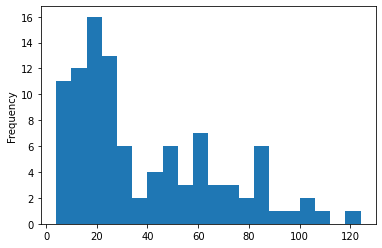

In [7]:
df_dataset['duration'].plot.hist(bins=20)

In [8]:
classes = [str(p) for p in df_dataset['person'].unique()]

def compute_metrics(threshold=0.5):
    label = np.array([str(p) for p in df_dataset['person']])
    predicted = np.array([str(p['predicted']) if p['confidence'] > threshold else '0' for i, p in df_dataset.iterrows() ])
    predicted = ['Rincquesen, Nathanaël de' if p == 'Rincquesen, Nathanaël de' else p for p in predicted]
    
    return score(label, predicted, labels=classes, zero_division=1)

def show_metrics(threshold=0.5):
    precision , recall, fscore, support = compute_metrics(threshold)

    dfx = pd.DataFrame()
    dfx['index']= classes
    dfx['precision'] =  precision
    dfx['recall'] =  recall
    dfx['fscore'] =  fscore
    dfx['support'] =  support

    tot = {
        'index' : 'tot (excluded 0)',
        'precision': np.average(precision[0:-1], weights=support[0:-1]),
        'recall' : np.average(recall[0:-1], weights=support[0:-1]),
        'fscore' : np.average(fscore[0:-1], weights=support[0:-1]),
        'support' : np.sum(support)
    }
    dfx = dfx.append(pd.DataFrame(tot, index=[7]))
    return dfx

In [9]:
widgets.interact(show_metrics, threshold=widgets.FloatSlider(min=0, max=1, step=0.05, value=0.60));

interactive(children=(FloatSlider(value=0.6, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

In [10]:
precision =[]
recall =[]
fscore =[]

_range = np.arange(0, 0.8, 0.05)
for threshold in _range:
    p, r, f, support = compute_metrics(threshold)
    precision.append(np.average(p[0:-1], weights=support[0:-1]))
    recall.append(np.average(r[0:-1], weights=support[0:-1]))
    fscore.append(np.average(f[0:-1], weights=support[0:-1]))

In [11]:
np.argmax(fscore) * 0.05

0.5

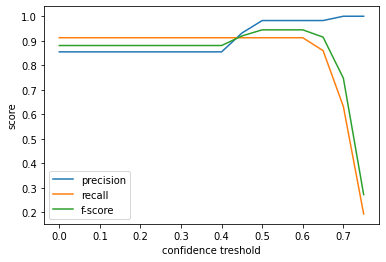

In [12]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(_range, precision, label='precision')  # Plot some data on the axes.
ax.plot(_range, recall, label='recall')  # Plot more data on the axes...
ax.plot(_range, fscore, label='f-score')  # ... and some more.
ax.set_xlabel('confidence treshold')  # Add an x-label to the axes.
ax.set_ylabel('score')  # Add a y-label to the axes.
ax.legend()  # Add a legend
plt.savefig('plot/memad_facerec_precision.pdf')  

0.6 looks like the best threshold. I save the results

In [13]:
show_metrics(0.6)

,index,precision,recall,fscore,support
0,"Le Saint, Sophie",0.900000,0.900000,0.900000,10
1,"Delahousse, Laurent",1.000000,1.000000,1.000000,7
2,"Lucet, Elise",1.000000,0.900000,0.947368,10
3,"Gastrin, Sophie",1.000000,0.900000,0.947368,10
4,"Rincquesen, Nathanaël de",1.000000,0.800000,0.888889,10
5,"Drucker, Marie",1.000000,1.000000,1.000000,10
6,0,0.893617,0.976744,0.933333,43
7,tot (excluded 0),0.982456,0.912281,0.944496,100


In [14]:
with open('plot/latex_memad.txt', 'w') as f:
    show_metrics(0.6).to_latex(f, index=False)

In [15]:
pd.set_option('display.max_colwidth', None)

def filter_by(prop):
    def filter_with(what):
        return df_dataset[df_dataset[prop] == what][['media','locator', 'start', 'end','person', 'predicted', 'confidence']]
    return filter_with
    
widgets.interact(filter_by('person'), what=widgets.Dropdown(
    options=df_dataset['person'].unique(),
    description='Person:',
));

interactive(children=(Dropdown(description='Person:', options=('Le Saint, Sophie', 'Delahousse, Laurent', 'Luc…